In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy.linalg import solve_triangular

In [3]:
data = np.genfromtxt('data.txt')

In [4]:
ti = data[:,0]
tineu = (ti-ti.min())/(ti.max()-ti.min())
yi = data[:,1]

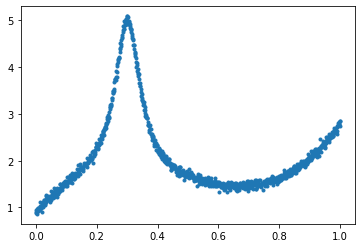

In [5]:
plt.plot(tineu,yi,'.')

In [6]:
order = 3
s0 = 100
x0 = 80300
x0neu = (x0-ti.min())/(ti.max()-ti.min())
s0neu = s0/(ti.max()-ti.min())
A = np.array([tineu**k for k in range(order+1)]+[1/(1+((tineu-x0neu)/(s0neu/2))**2)]).T

In [7]:
np.linalg.cond(A)

158.00984059246701

In [8]:
q,r = np.linalg.qr(A)
w = solve_triangular(r,q.T@yi)

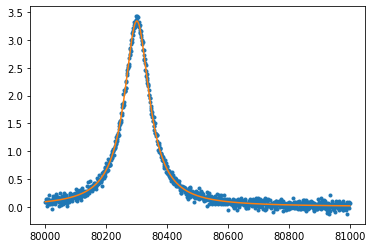

In [9]:
plt.plot(ti,yi-A[:,:-1]@w[:-1],'.')
plt.plot(ti,A[:,-1]*w[-1],'-')

In [10]:
w[-1]

3.3423237912151014